### Chapter2. 자연어와 단어의 분산 표현
1. 자연어 처리란
- Natural Language Processing NLP 자연어를 처리하는 분야

2. 시소러스 
- 단어의 의미를 나타내는 방법으로 번저 사람이 직접 단어의 의미를 정의(사전)
- WordNet : 자연어 처리분야에서 가장 유명한 시소러스. 사용 유의어를 얻거나 단어 네트워크 사용 단어 사이의 유사도 측정
- 문제점 : 시대 변화에 대응이 어렵다. 사람을 쓰는 비용이 크다. 단어의 미묘한 차이를 표현할 수 없다.

3. 통계 기반 기법
- 말뭉치 corpus

In [1]:
# 말뭉치 전처리
text = 'You say goodbye and i say hello.'

In [2]:
# 단어 단위 분할
text = text.lower()
text = text.replace('.', ' .')
text

'you say goodbye and i say hello .'

In [3]:
words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [4]:
# 단어 ID와 단어를 짝지어주는 대응표 작성
word_to_id = {}
id_to_word = {}

for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

In [5]:
print("id_to_word :", id_to_word)
print("word_to_id :", word_to_id)

id_to_word : {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
word_to_id : {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}


In [6]:
# 단어 목록을 단어 ID 목록으로 변경
import numpy as np
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [15]:
# 함수 구현
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')

    word_to_id = {}
    id_to_word = {}

    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word

In [16]:
corpus, word_to_id, id_to_word = preprocess(text)
print('corpus :', corpus, '\nword_to_id :', word_to_id, '\nid_to_word :', id_to_word)

corpus : [0 1 2 3 4 1 5 6 7] 
word_to_id : {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '': 6, '.': 7} 
id_to_word : {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '', 7: '.'}


- 단어의 분산 표현 distributional representation 단어의 의미를 정확하게 파악할 수 있는 벡터 표현


- 분포 가설 distribution hypothesis 단어의 의미는 주변 단어에 의해 형성


- 동시발생 행렬 co-occurrence matrix

In [17]:
import sys
sys.path.append('D:/Python/14.밑바닥부터시작하는딥러닝/2/common')

import numpy as np
from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)
print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [18]:
# 동시발생 행렬
C = np.array([
    [0,1,0,0,0,0,0],
    [1,0,1,0,1,1,0],
    [0,1,0,1,0,0,0],
    [0,0,1,0,1,0,0],
    [0,1,0,1,0,0,0],
    [0,1,0,0,0,0,1],
    [0,0,0,0,0,1,0],
], dtype=np.int32)

In [19]:
print(C[word_to_id['goodbye']])

[0 1 0 1 0 0 0]


In [20]:
# 동시발생 행렬 함수
def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + 1

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] +=1

            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1

    return co_matrix

In [21]:
create_co_matrix(corpus, 7)

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]])

- 벡터 간 유사도
    - 코사인 유사도
    - $similarity(x, y) = \cfrac{x\cdot y}{||x||\,||y||} $  
      $=  \cfrac {x_1y_1 + \cdots + x_ny_n}{\sqrt{x_{1}^{2} + \cdots + x_{n}{2}}\sqrt{y_{1}^2} + \cdots + y_{n}^{2}}$

In [22]:
# cosine similarity
def cos_similarity(x, y, eps=1e-8):
    # devide by zero 오류 방지를 위해 분보아 아주작은값 epsilon 을 더해줌
    nx = x / (np.sqrt(np.sum(x**2)) + eps)  # x의 정규화
    ny = x / (np.sqrt(np.sum(y**2)) + eps)  # y의 정규화
    return np.dot(nx, ny)

In [23]:
import sys
sys.path.append('D:/Python/14.밑바닥부터시작하는딥러닝/2/ch02')

# 단어 벡터의 유사도
from common.util import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']]
c1 = C[word_to_id['i']]

print(cos_similarity(c0, c1))

0.7071067691154799


- 유사 단어의 랭킹 표시

In [24]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    if query not in word_to_id:
        print('%s(을)를 찾을 수 없습니다.' % query)
        return

    print('\n[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    # 코사인 유사도 계산
    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)

    # 코사인 유사도를 기준으로 내림차순으로 출력
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(' %2: %s' % (id_to_word[i], similarity[i]))

        count += 1
        if count >= top:
            return



In [25]:
from common.util import preprocess, create_co_matrix, most_similar

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


4. 통계 기반 기법 개선하기
- 상호정보량  
  Pointwise Mutual Information PMI  
  $PMI(x, y) = log_2\cfrac{P(x, y)}{P(x) P(y)} = log_2\cfrac{\cfrac{C(x, y)}{N}}{\cfrac{C(x)}{N}\cfrac{C(y)}{N}} = log_x \cfrac{C(x, y)\cdot N}{C(x)C(y)}$  
  $PPMI(x, y) = max(0, PMI(x, y))$



In [26]:
# 양의 상호정보량 Positive PMI 구현
def ppmi(C, verbose=False, eps=1e-8):
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(c[i, j] * N / (S[j]*S[i] + eps))
            M[i, j] = max(0, pmi)

            # 진행상황 출력, 큰 말뭉치 다룰 때 verbose=True
            if verbose:
                cnt += 1
                if cnt % (total//100 + 1) == 0:
                    print('%.1f%% 완료' % (100*cnt/total))
    return M

In [27]:
import numpy as np
from common.util import preprocess, create_co_matrix, cos_similarity, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3)
print('동시발생 행렬')
print(C)
print('-'*50)
print('PPMI')
print(W)

동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


- 차원감소
    - 특이값 분해 Singular Value Decomposition SVD : $X = USV^T$

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size, window_size=1)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)

In [29]:
print('동시발생행렬 :', C[0])
print('PPMI :', W[0])
print('SVD : ', U[0])

동시발생행렬 : [0 1 0 0 0 0 0]
PPMI : [0.    1.807 0.    0.    0.    0.    0.   ]
SVD :  [-1.110e-16  3.409e-01 -1.205e-01 -4.163e-16 -1.110e-16 -9.323e-01
 -2.426e-17]


In [30]:
# 2차원 벡터로 줄이려면 단순히 처음 두 원소를 꺼내면 됨
print(U[0, :2])

[-1.110e-16  3.409e-01]


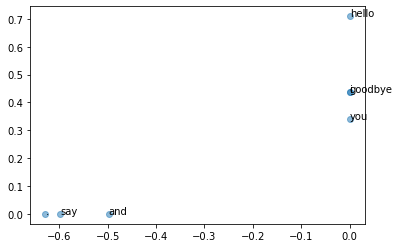

In [31]:
# 각 단어를 2차원 벡터로 표현한 후 그래프 출력
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))

plt.scatter(U[:, 0], U[:, 1], alpha=0.5)
plt.show()

In [32]:
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')

print('말뭉치 크기 :', len(corpus))
print('corpus[:30] :', corpus[:30])
print()
print('id_to_word[0] :', id_to_word[0])
print('id_to_word[1] :', id_to_word[1])
print('id_to_word[2] :', id_to_word[2])
print()
print("word_to_id['car'] :", word_to_id['car'])
print("word_to_id['happy'] :", word_to_id['happy'])
print("word_to_id['lexus'] :", word_to_id['lexus'])

말뭉치 크기 : 929589
corpus[:30] : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0] : aer
id_to_word[1] : banknote
id_to_word[2] : berlitz

word_to_id['car'] : 3856
word_to_id['happy'] : 4428
word_to_id['lexus'] : 7426


: 

In [8]:
import numpy as np
from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb


window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('동시발생 수 계산 ...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('PPMI 계산 ...')
W = ppmi(C, verbose=True)

print('calculating SVD ...')
try:
    # truncated SVD (빠르다!)
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
                             random_state=None)
except ImportError:
    # SVD (느리다)
    U, S, V = np.linalg.svd(W)

word_vecs = U[:, :wordvec_size]

querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

동시발생 수 계산 ...
PPMI 계산 ...


d:\Python\14.밑바닥부터시작하는딥러닝\2\common\util.py:141: RuntimeWarning: overflow encountered in long_scalars
  pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
d:\Python\14.밑바닥부터시작하는딥러닝\2\common\util.py:141: RuntimeWarning: invalid value encountered in log2
  pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)


1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료
calculating SVD ...

[query] you
 i: 0.6798528432846069
 we: 0.6487141847610474
 do: 0.548755407333374
 anybody: 0.538